# Acá iré haciendo un intento de leer las señales adquiridas

In [1]:
# para tener las librerías necesarias, crea el enviromet desde el yml llamado enviroment_lab3.yml

In [5]:
# librerías necesarias
import h5py
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import butter, filtfilt

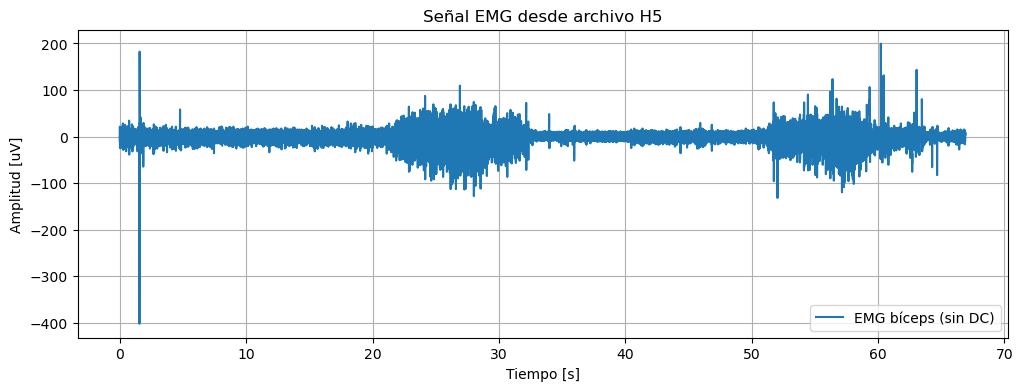

In [7]:
# Intento de leer directamente el archivo H5
# Acá por ejemplo leeré el de biceps
ruta_h5 = '../Señales adquiridas en el laboratorio/bicep_reposo_lento_20-30-50-60.h5'
fs = 1000  # Hz

with h5py.File(ruta_h5, 'r') as f:
    # Cargar el canal EMG
    emg = f['98:D3:81:FD:6D:86/raw/channel_1'][:]

# Vector de tiempo
t = np.arange(len(emg)) / fs

# Quitar componente DC
emg_dc = emg - np.mean(emg)

# Graficar
plt.figure(figsize=(12, 4))
plt.plot(t, emg_dc, label="EMG bíceps (sin DC)")
plt.title("Señal EMG desde archivo H5")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [uV]")
plt.grid(True)
plt.legend()
plt.show()


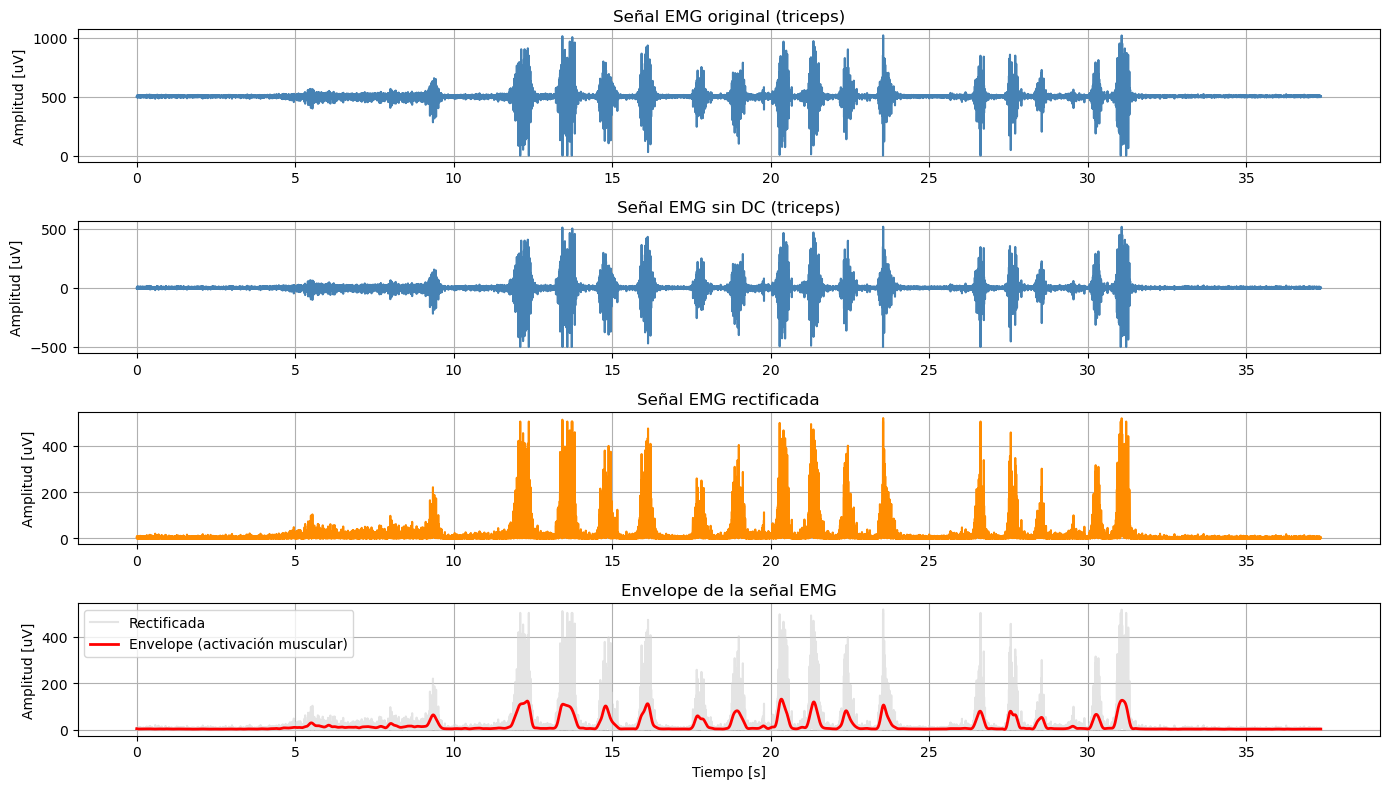

In [8]:
# Intento de correrlo con el txt

# Acá por ejemplo haré un procesamiento básico de una señal EMG para la señal del triceps
# --- Datos ---
#ruta2 = '../Señales adquiridas en el laboratorio/bicep_reposo_lento_20-30-50-60.txt'
ruta2 = '../Señales adquiridas en el laboratorio/tricep_1-09-03_12-51-37.txt'

data_txt = np.loadtxt(ruta2)
fs = 1000  # Hz

# Extraer canal EMG (A1)
emg = data_txt[:, -1]

# Vector de tiempo
t = np.arange(len(emg)) / fs

# --- Preprocesamiento ---
# 1. Quitar componente DC
emg_dc = emg - np.mean(emg)

# 2. Rectificación (valor absoluto)
emg_rect = np.abs(emg_dc)

# 3. Envelope con filtro pasa-bajas
def butter_lowpass(cutoff, fs, order=4):
    nyq = 0.5 * fs
    normal_cutoff = cutoff / nyq
    b, a = butter(order, normal_cutoff, btype='low', analog=False)
    return b, a

cutoff = 5  # Hz (suave para obtener envelope)
b, a = butter_lowpass(cutoff, fs)
emg_envelope = filtfilt(b, a, emg_rect)

# --- Gráficas ---
plt.figure(figsize=(14, 8))

# Señal original
plt.subplot(4, 1, 1)
plt.plot(t, emg, color='steelblue')
plt.title("Señal EMG original (triceps)")
plt.ylabel("Amplitud [uV]")
plt.grid(True)

# Señal cruda sin DC
plt.subplot(4, 1, 2)
plt.plot(t, emg_dc, color='steelblue')
plt.title("Señal EMG sin DC (triceps)")
plt.ylabel("Amplitud [uV]")
plt.grid(True)

# Señal rectificada
plt.subplot(4, 1, 3)
plt.plot(t, emg_rect, color='darkorange')
plt.title("Señal EMG rectificada")
plt.ylabel("Amplitud [uV]")
plt.grid(True)

# Envelope
plt.subplot(4, 1, 4)
plt.plot(t, emg_rect, color='lightgray', alpha=0.6, label="Rectificada")
plt.plot(t, emg_envelope, color='red', linewidth=2, label="Envelope (activación muscular)")
plt.title("Envelope de la señal EMG")
plt.xlabel("Tiempo [s]")
plt.ylabel("Amplitud [uV]")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()